In [2]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [36]:
df = pd.read_excel('NYC_Offenses_Data.xls', skip_rows=[0, 1, 2, 3], header=4, nrows=348)

In [37]:
df.rename(columns={df.columns[3]: "Murder1"}, inplace=True)
df.rename(columns={df.columns[4]: "Rape1"}, inplace=True)
df.rename(columns={df.columns[5]: "Rape2"}, inplace=True)
df.rename(columns={df.columns[8]: "Property crime"}, inplace=True)
df.fillna(0)

,City,Population,Violent crime,Murder1,Rape1,Rape2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0.000,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,0.000,30,227,526,4090,705,3243,142,0.000
4,Albion Village,6388,23,0,0.000,3,4,16,223,53,165,5,0.000
5,Alfred Village,4089,5,0,0.000,0,3,2,46,10,36,0,0.000
6,Allegany Village,1781,3,0,0.000,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,0.000,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,0.000,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,0.000,0,12,18,405,99,291,15,0.000


In [38]:
city = pd.get_dummies(df.City)
df.drop(['City'], inplace=True, axis=1)
df_merge = pd.concat([df, city], axis=1)
df_merge.drop(df_merge.columns[3], axis=1, inplace=True)
df_merge['Murder1'] = pd.to_numeric(df_merge['Murder1'])
df_merge.loc[df_merge.Murder1 > 0, 'Murder1'] = 1
df_merge.loc[df_merge.Robbery > 0, 'Robbery'] = 1

In [39]:
df['Population**2'] = df['Population']**2

In [34]:
df.head()
print(df.columns[7])

Property
crime


In [40]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population**2','Murder1', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
df.info()


Coefficients: 
 [[ 1.59234099e-02 -1.01045767e-09  1.17559526e+02  2.09186042e+00]]

Intercept: 
 [24.1435902]

R-squared:
0.9987417422426106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
Population             348 non-null int64
Violent
crime          348 non-null int64
Murder1                348 non-null int64
Rape1                  0 non-null float64
Rape2                  348 non-null int64
Robbery                348 non-null int64
Aggravated
assault     348 non-null int64
Property crime         348 non-null int64
Burglary               348 non-null int64
Larceny-
theft         348 non-null int64
Motor
vehicle
theft    348 non-null int64
Arson3                 187 non-null float64
Population**2          348 non-null int64
dtypes: float64(2), int64(11)
memory usage: 35.4 KB


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


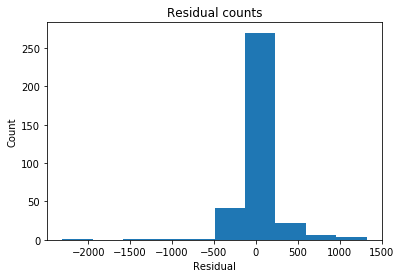

In [53]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

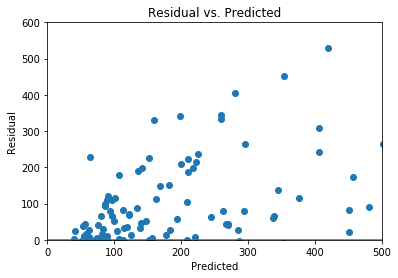

In [61]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,500)
plt.ylim(0,600)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [45]:
X_trans = X[['Population','Population**2','Murder1', 'Robbery']].values
X_trans = X_trans**0.75
predicted_trans = regr.predict(X_trans).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual_trans = actual - predicted_trans

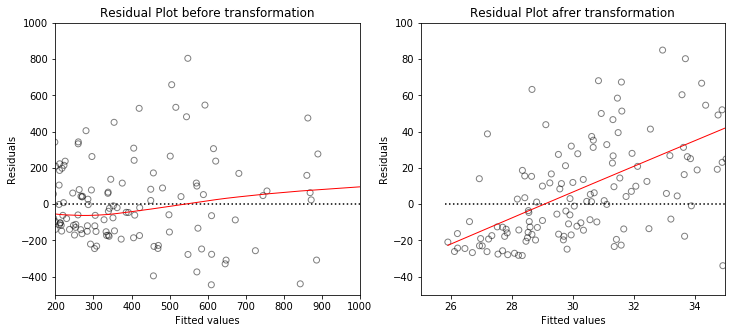

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_xlim(left=200, right=1000)
ax1.set_ylim(bottom=-500, top=1000)
ax2.set_xlim(left=25, right=35)
ax2.set_ylim(bottom=-50, top=100)
# Left plot
sns.regplot(predicted, residual, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot before transformation')

# Right plot
sns.regplot(predicted_trans, residual_trans, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot afrer transformation')
for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')